<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/practicasregresionlasso_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  



---


#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual

✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ClassFiles/insurance.csv")
print("Primeras lineas del archivo: \n" , df.head())
print(df.info())
print("\nAnalisis estadistico del dataset \n", df.describe())

Primeras lineas del archivo: 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Analisis estadistico del dataset 
                age      

In [3]:
#Separar las caracteristicas en numéricas y categóricas
categorical_feature = ['sex', 'smoker']
numerical_columns = ['age', 'bmi', 'children', 'charges']

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.   

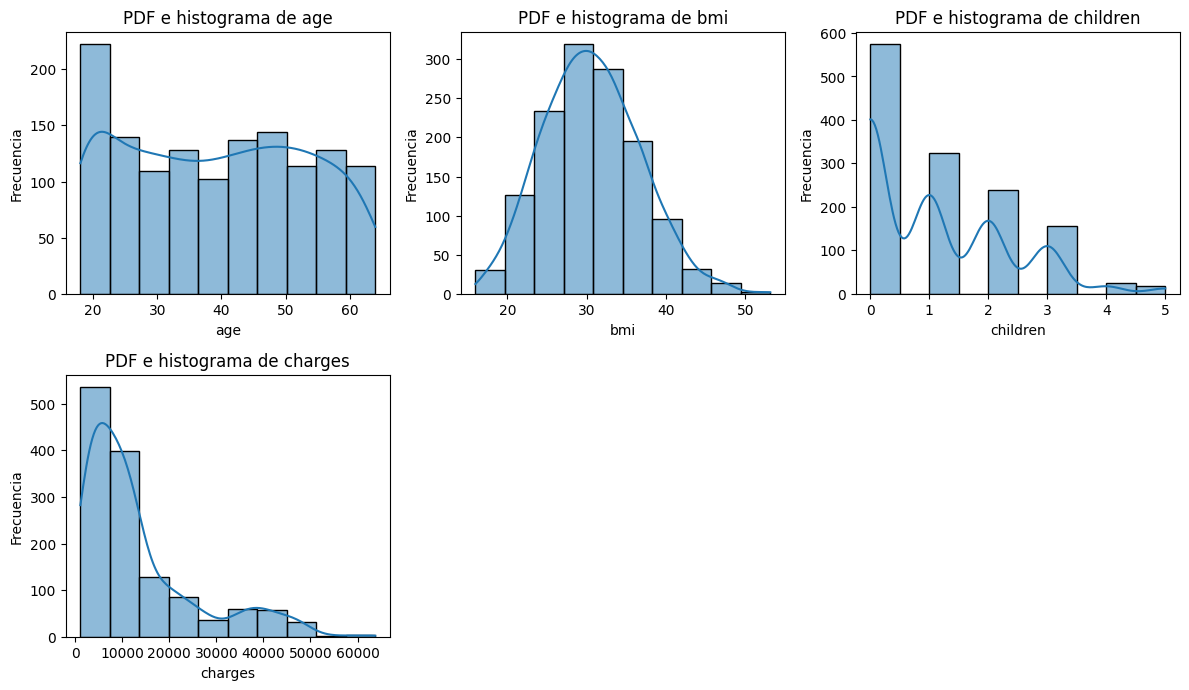

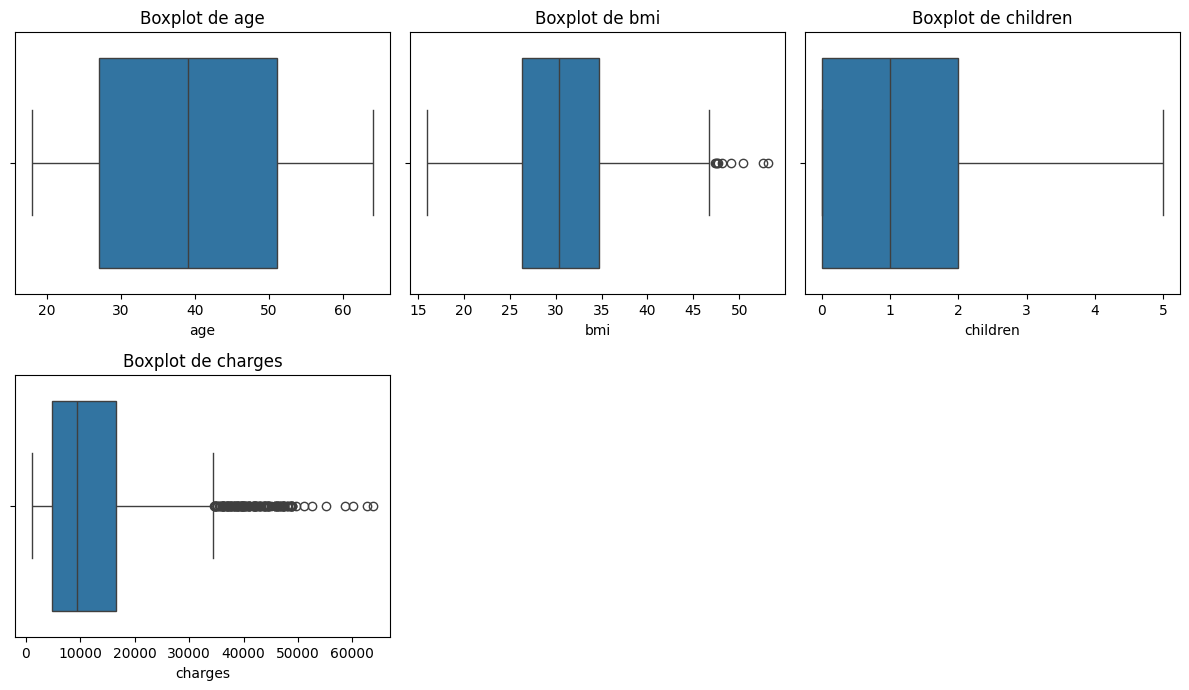

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
for i,col in enumerate(numerical_columns,1):
  plt.subplot(3,3,i)
  sns.histplot(df[col], kde=True, bins=10)
  plt.title(f'PDF e histograma de {col}', fontsize=12)
  plt.xlabel(col, fontsize=10)
  plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,10))
for i,col in enumerate(numerical_columns,1):
  plt.subplot(3,3,i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot de {col}', fontsize=12)
  plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

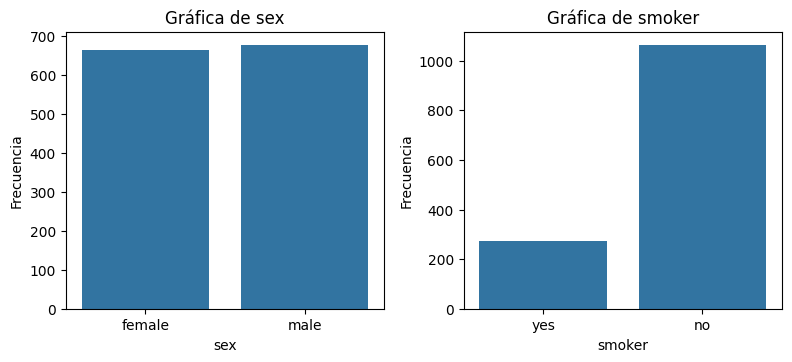

In [5]:


plt.figure(figsize=(12,10))
for i,col in enumerate(categorical_feature,1):
  plt.subplot(3,3,i)
  sns.countplot(x=df[col], data=df)
  plt.title(f'Gráfica de {col}', fontsize=12)
  plt.xlabel(col, fontsize=10)
  plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  


Correlacion de Pearson
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


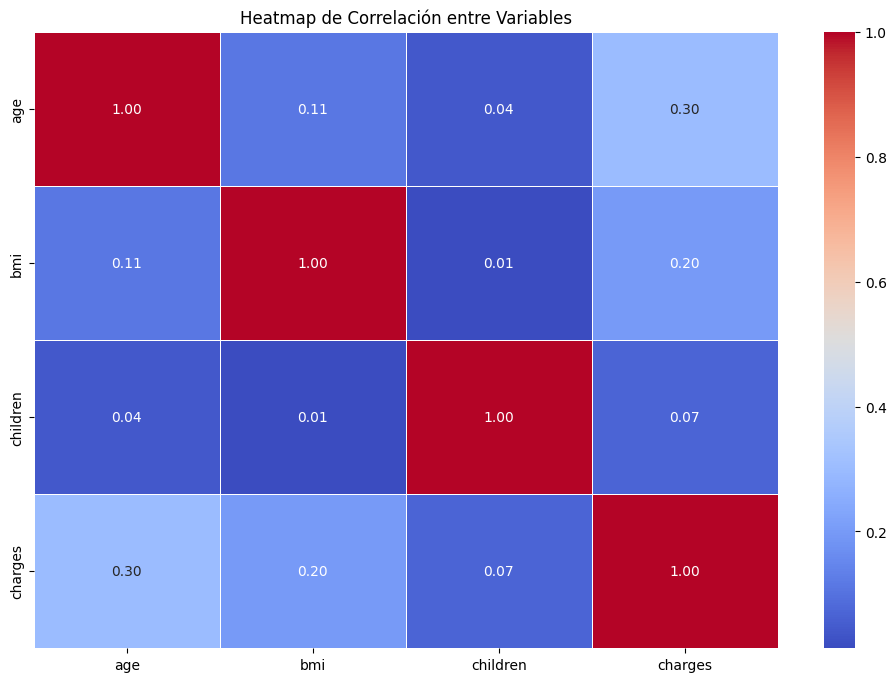

In [6]:
# Correlación y heatmap
# 5. Heatmap de correlación entre todas las variables
# Cálculo de correlación
numerical_df = df[numerical_columns]
correlacion_df = numerical_df.corr(method = 'pearson')
print(f"Correlacion de Pearson\n{correlacion_df}")
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables")
plt.show()

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X = df.drop('charges', axis=1)
y = df['charges']

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns


numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un preprocesador para escalar las variables numéricas y codificar las categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])



#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

In [8]:
# Definir el parámetro de regularización (alpha)
# Se puede ajustar con validación cruzada para optimizar el rendimiento
alpha = 0.1  # Controla la penalización sobre los coeficientes

# Crear un pipeline que primero preprocesa los datos y luego aplica regresión Lasso
lasso = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(alpha=alpha))
])

# Entrenar el modelo Lasso con los datos
lasso.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'bmi', 'children'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('lasso', Lasso(alpha=0.1))])

In [21]:
# Definir un valor fijo de alpha
alpha = 1.0  # Se puede ajustar manualmente según necesidad

# Crear un pipeline con Ridge
ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("ridge", Ridge(alpha=alpha))
])
# Entrenar el modelo Ridge
ridge.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'bmi', 'children'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('ridge', Ridge())])

In [22]:
# Obtener los coeficientes después del ajuste
feature_names = list(numerical_features) + list(lasso.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out())
coef_lasso = pd.Series(lasso.named_steps["lasso"].coef_, index=feature_names)
print("Lasso Coefficients:\n", coef_lasso)

feature_names_ridge = list(numerical_features) + list(ridge.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out())
coef_ridge = pd.Series(ridge.named_steps["ridge"].coef_, index=feature_names_ridge)
print("\nRidge Coefficients:\n", coef_ridge)

Lasso Coefficients:
 age                 3.607426e+03
bmi                 2.067488e+03
children            5.729036e+02
sex_female          1.308618e+02
sex_male           -0.000000e+00
smoker_no          -2.384784e+04
smoker_yes          1.768650e-11
region_northeast    8.903855e+02
region_northwest    5.374241e+02
region_southeast   -1.436771e+02
region_southwest   -6.879506e+01
dtype: float64

Ridge Coefficients:
 age                  3604.508400
bmi                  2065.647897
children              572.918956
sex_female             63.869282
sex_male              -63.869282
smoker_no          -11896.493043
smoker_yes          11896.493043
region_northeast      584.970479
region_northwest      231.553872
region_southeast     -443.352352
region_southwest     -373.172000
dtype: float64


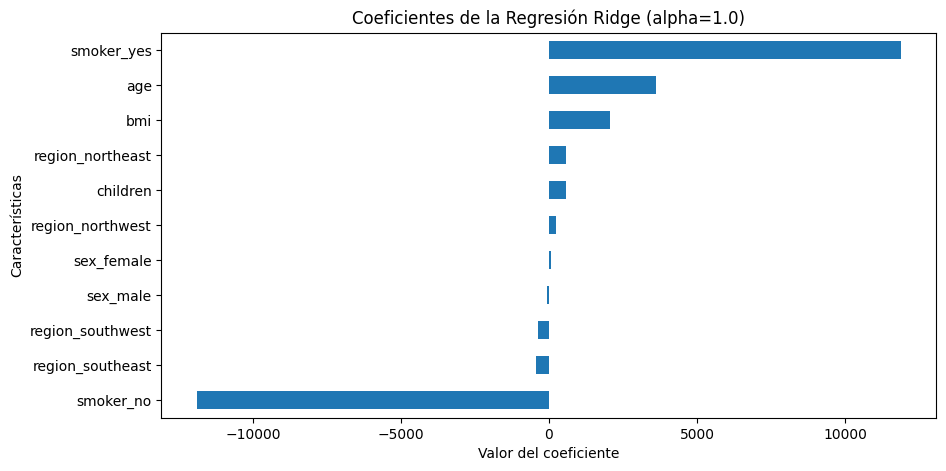

In [23]:
# Graficar los coeficientes de la regresión Ridge
plt.figure(figsize=(10, 5))
coef_ridge.sort_values().plot(kind="barh")
plt.title(f"Coeficientes de la Regresión Ridge (alpha={alpha})")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Características")
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluación del modelo con métricas de desempeño
y_pred = ridge.predict(X)

MSE = mean_squared_error(y, y_pred)  # Error cuadrático medio
RMSE = np.sqrt(MSE)  # Raíz del error cuadrático medio
MAE = mean_absolute_error(y, y_pred)  # Error absoluto medio
R2 = r2_score(y, y_pred)  # Coeficiente de determinación
n_nonzero_coef = np.sum(coef_ridge != 0)  # Número de coeficientes distintos de cero

# Imprimir los resultados de las métricas
print("Evaluación del modelo Ridge:")
print(f"MSE: {MSE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"MAE: {MAE:.2f}")
print(f"R^2: {R2:.4f}")
print(f"Número de coeficientes no nulos: {n_nonzero_coef}")

Evaluación del modelo Ridge:
MSE: 36502401.08
RMSE: 6041.72
MAE: 4174.38
R^2: 0.7509
Número de coeficientes no nulos: 11


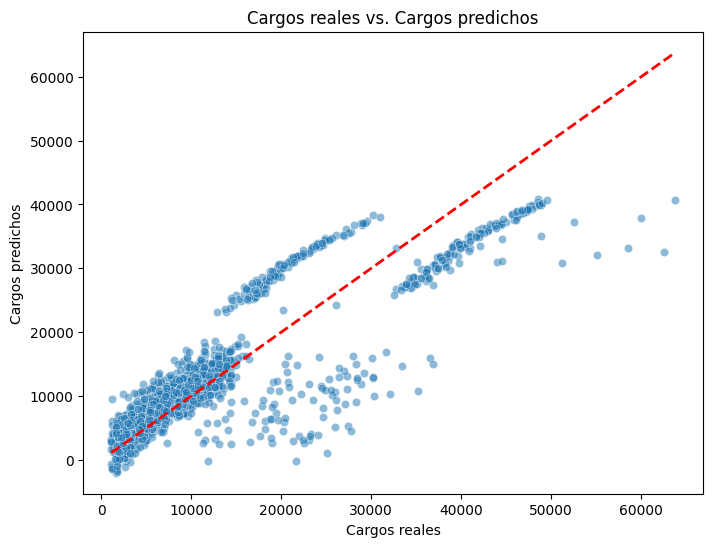

In [25]:
# Gráfico de dispersión: Precio real vs. Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel("Cargos reales")
plt.ylabel("Cargos predichos")
plt.title("Cargos reales vs. Cargos predichos")
plt.show()

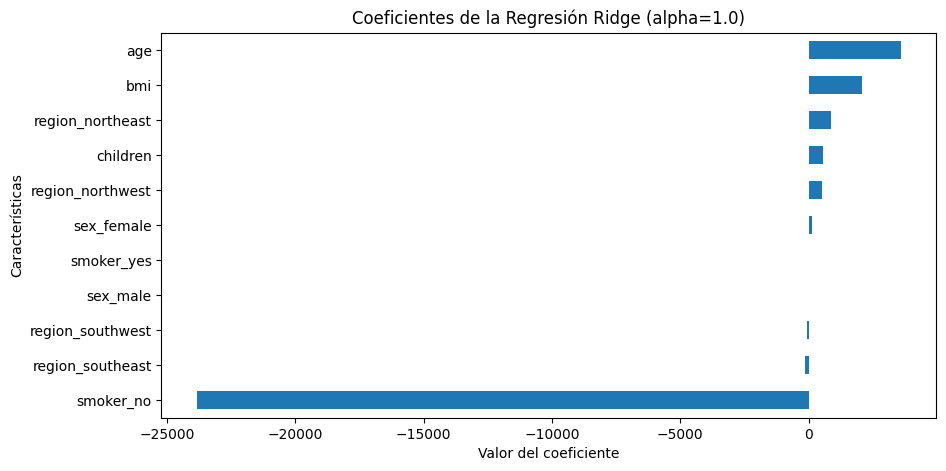

In [26]:
# Graficar los coeficientes de la regresión Lasso
plt.figure(figsize=(10, 5))
coef_lasso.sort_values().plot(kind="barh")
plt.title(f"Coeficientes de la Regresión Ridge (alpha={alpha})")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Características")
plt.show()

In [30]:
# Evaluación del modelo con métricas de desempeño
y_pred_lasso = lasso.predict(X)
MSE_lasso = mean_squared_error(y, y_pred_lasso)  # Error cuadrático medio
RMSE_lasso = np.sqrt(MSE_lasso)  # Raíz del error cuadrático medio
MAE_lasso = mean_absolute_error(y, y_pred_lasso)  # Error absoluto medio
R2_lasso = r2_score(y, y_pred_lasso)  # Coeficiente de determinación
n_nonzero_coef_lasso = np.sum(coef_lasso != 0)  # Número de coeficientes distintos de cero

In [32]:
# Imprimir los resultados de las métricas
print("Evaluación del modelo Lasso:")
print(f"MSE: {MSE_lasso:.2f}")
print(f"RMSE: {RMSE_lasso:.2f}")
print(f"MAE: {MAE_lasso:.2f}")
print(f"R^2: {R2_lasso:.4f}")
print(f"Número de coeficientes no nulos: {n_nonzero_coef_lasso}")


Evaluación del modelo Lasso:
MSE: 36501893.34
RMSE: 6041.68
MAE: 4170.89
R^2: 0.7509
Número de coeficientes no nulos: 10


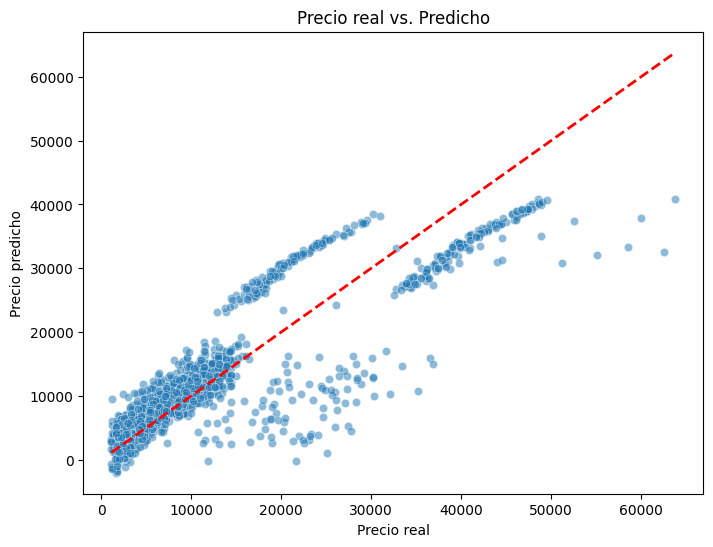

In [33]:
# Gráfico de dispersión: Precio real vs. Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred_lasso, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precio real vs. Predicho")
plt.show()

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

Shapiro-Wilk Test (Ridge): Statistic=0.8989, p-value=0.0000


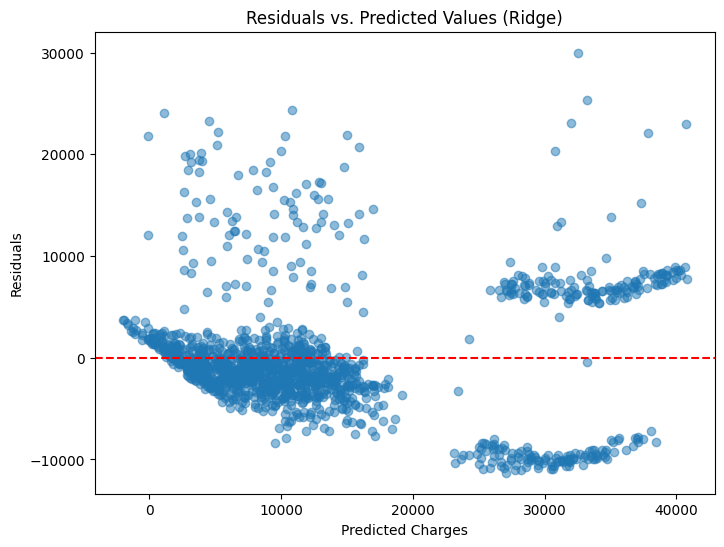


Shapiro-Wilk Test (Lasso): Statistic=0.8989, p-value=0.0000


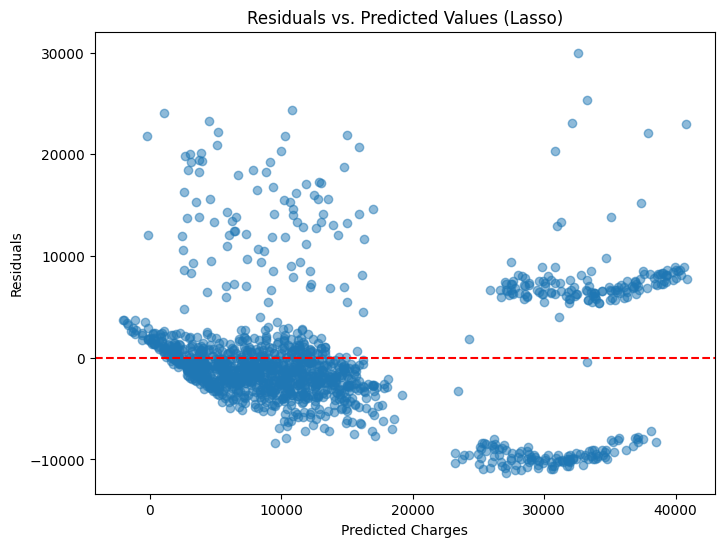

In [40]:
from scipy.stats import shapiro
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Shapiro-Wilk test for normality of residuals (Ridge)
shapiro_test_ridge = shapiro(residuals)
print(f"Shapiro-Wilk Test (Ridge): Statistic={shapiro_test_ridge.statistic:.4f}, p-value={shapiro_test_ridge.pvalue:.4f}")

# Residual plot for homocedasticity (Ridge)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Ridge)")
plt.show()

# Shapiro-Wilk test for normality of residuals (Lasso)
shapiro_test_lasso = shapiro(residuals_lasso)
print(f"\nShapiro-Wilk Test (Lasso): Statistic={shapiro_test_lasso.statistic:.4f}, p-value={shapiro_test_lasso.pvalue:.4f}")

# Residual plot for homocedasticity (Lasso)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Lasso)")
plt.show()

In [44]:
# Calculate VIF for multicollinearity (using the processed features)
# We need to add a constant to the features for VIF calculation
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Re-apply preprocessing to ensure X_processed is available
X = df.drop('charges', axis=1)
y = df['charges']

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

X_processed = preprocessor.fit_transform(X)


X_processed_const = sm.add_constant(X_processed)
vif_data = pd.DataFrame()
vif_data["feature"] = ['const'] + list(preprocessor.get_feature_names_out())
vif_data["VIF"] = [variance_inflation_factor(X_processed_const, i) for i in range(X_processed_const.shape[1])]

print("\nVIF for Multicollinearity:")
print(vif_data)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



VIF for Multicollinearity:
                  feature           VIF
0                   const  0.000000e+00
1                num__age  1.014739e+00
2                num__bmi  1.106548e+00
3           num__children  1.003670e+00
4         cat__sex_female  3.088259e+04
5           cat__sex_male  2.212331e+06
6          cat__smoker_no  1.023657e+06
7         cat__smoker_yes  2.575587e+03
8   cat__region_northeast  8.645304e+07
9   cat__region_northwest  7.115926e+06
10  cat__region_southeast  6.825442e+08
11  cat__region_southwest  6.209522e+04


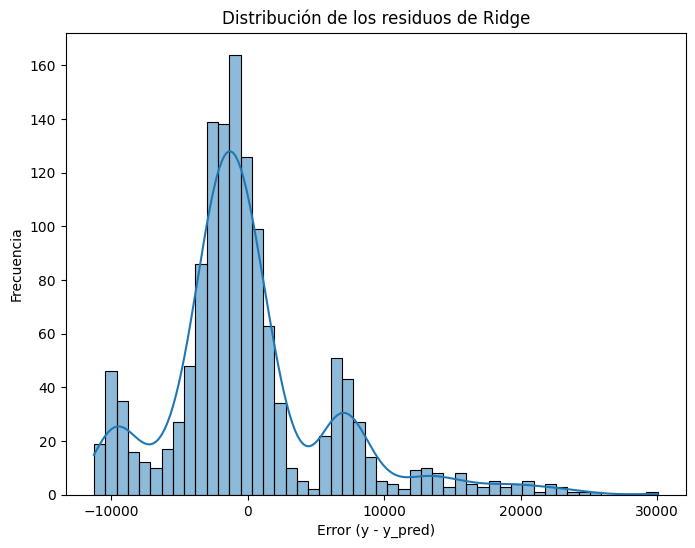

In [34]:
# Histograma de residuos Ridge
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Error (y - y_pred)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos de Ridge")
plt.show()

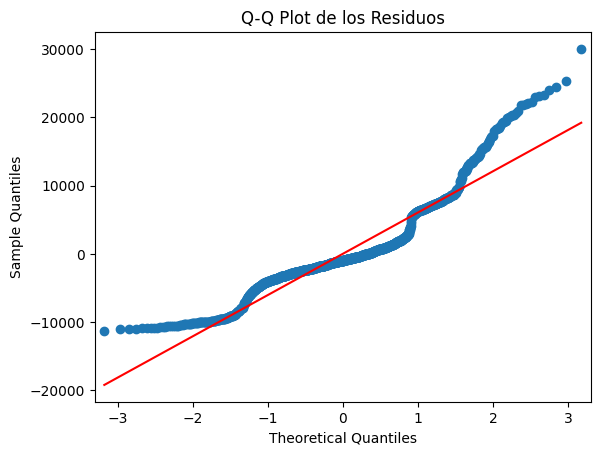

In [36]:
#Q-Q Plot
import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot de los Residuos')
plt.show()

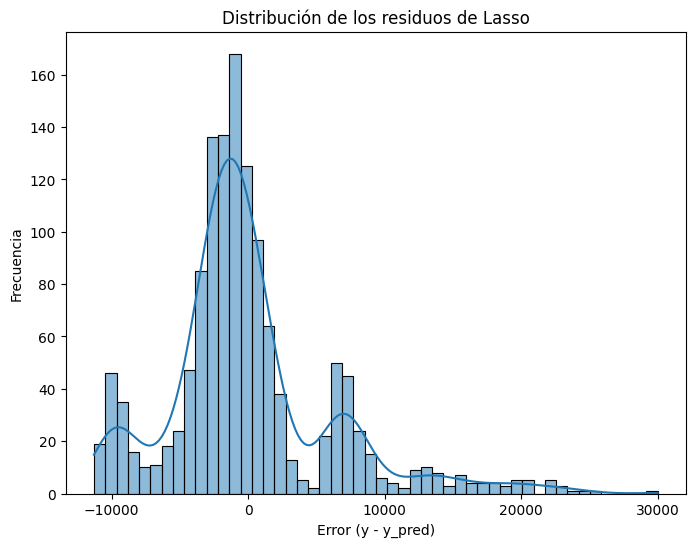

In [38]:
# Histograma de residuos
residuals_lasso = y - y_pred_lasso
plt.figure(figsize=(8, 6))
sns.histplot(residuals_lasso, bins=50, kde=True)
plt.xlabel("Error (y - y_pred)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos de Lasso")
plt.show()

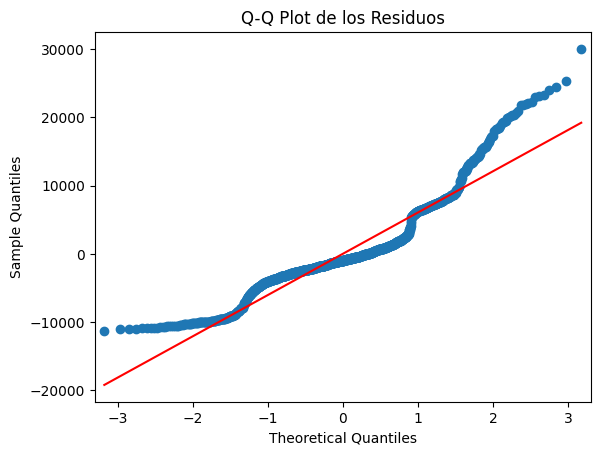

In [39]:
#Q-Q Plot
import statsmodels.api as sm

sm.qqplot(residuals_lasso, line='s')
plt.title('Q-Q Plot de los Residuos')
plt.show()

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  
